In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import os

sns.set()

from function_analisi import *


intercept:  [37.11930242] coef:  [[0.49334784]]
Pearson Correlation Coefficient:  0.9871803702042456 and a P-value of: 8.995528173008319e-156

---------------------------
sum random:  182840 sum non random:  355942
freq h random:  1088.3333333333333 freq h non random:  2118.7023809523807
freq min random:  18.13888888888889 freq min non random:  35.31170634920635
---------------------------

intercept:  [50.2244672] coef:  [[0.48957999]]
Pearson Correlation Coefficient:  0.9957076223515644 and a P-value of: 3.07787121314347e-24


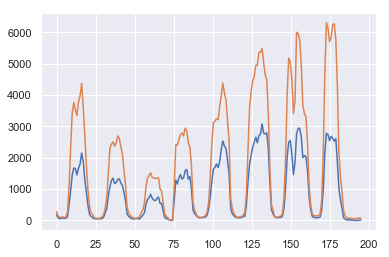

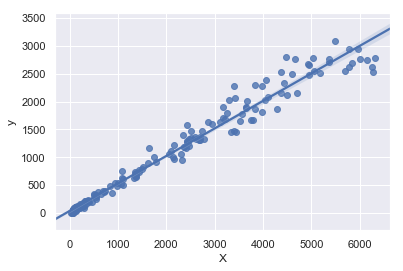

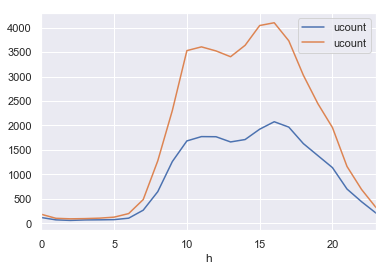

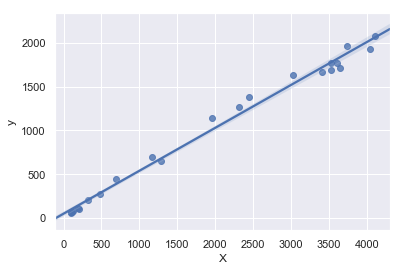

In [42]:
# Andamento dati 'veri' raw count maggiore di uno, durata maggiore di un secondo

df           = pd.read_csv('csv_pveri.txt')
  
df, dft, dff = organize(df,plot=False)

plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dft.ucount.values )
plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dff.ucount.values[:-1] )

plt.figure()
reg_rt(y = dft.ucount.values, X = dff.ucount.values[:-1])

print('\n---------------------------')
print('sum random: ', np.sum(dft.ucount.values),'sum non random: ', np.sum(dff.ucount.values))
print('freq h random: ', np.sum(dft.ucount.values)/(7*24),'freq h non random: ', np.sum(dff.ucount.values)/(7*24))
print('freq min random: ', np.sum(dft.ucount.values)/(7*24*60),'freq min non random: ', np.sum(dff.ucount.values)/(7*24*60))
print('---------------------------\n')

dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['ucount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['ucount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.ucount.values
y = tf.ucount.values

plt.figure()
reg_rt(X=y,y=X)




intercept:  [-140.40660675] coef:  [[0.936245]]
Pearson Correlation Coefficient:  0.9969711125438967 and a P-value of: 4.893306586635949e-216

---------------------------
sum random:  433580 sum non random:  492350
freq h random:  2580.8333333333335 freq h non random:  2930.654761904762
freq min random:  43.013888888888886 freq min non random:  48.84424603174603
---------------------------

intercept:  [-14.53530034] coef:  [[0.89466277]]
Pearson Correlation Coefficient:  0.9973163756106638 and a P-value of: 1.7689654765442832e-26


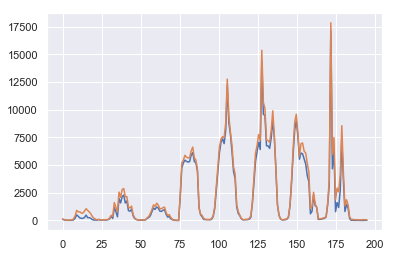

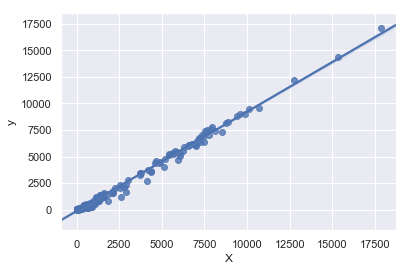

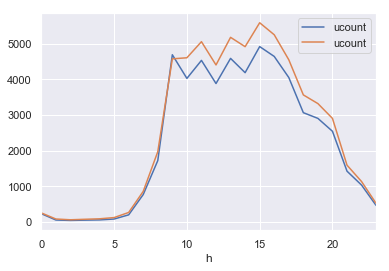

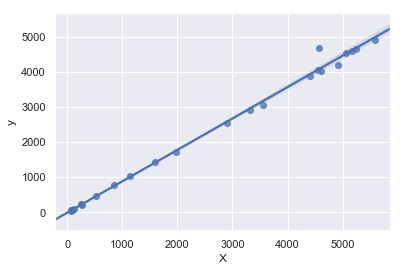

In [43]:
# Andamento dati 'rumore' raw count uguale a uno, durata minore di un secondo

df           = pd.read_csv('csv_rumore.txt')
df, dft, dff = organize(df,plot=False)

plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dft.ucount.values )
plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dff.ucount.values[:-1] )

plt.figure()
reg_rt(y=dft.ucount.values, X=dff.ucount.values[:-1])

print('\n---------------------------')
print('sum random: ', np.sum(dft.ucount.values),'sum non random: ', np.sum(dff.ucount.values))
print('freq h random: ', np.sum(dft.ucount.values)/(7*24),'freq h non random: ', np.sum(dff.ucount.values)/(7*24))
print('freq min random: ', np.sum(dft.ucount.values)/(7*24*60),'freq min non random: ', np.sum(dff.ucount.values)/(7*24*60))
print('---------------------------\n')


dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['ucount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['ucount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.ucount.values
y = tf.ucount.values

plt.figure()
reg_rt(X=y,y=X)




intercept:  [31.89690133] coef:  [[0.36227395]]
Pearson Correlation Coefficient:  0.9773888746346109 and a P-value of: 1.7262707935464988e-129

---------------------------
sum random:  57882 sum non random:  27060
freq h random:  344.5357142857143 freq h non random:  161.07142857142858
freq min random:  5.742261904761905 freq min non random:  2.6845238095238093
---------------------------

intercept:  [33.82469799] coef:  [[0.36036167]]
Pearson Correlation Coefficient:  0.9943698628354986 and a P-value of: 6.048023715432102e-23


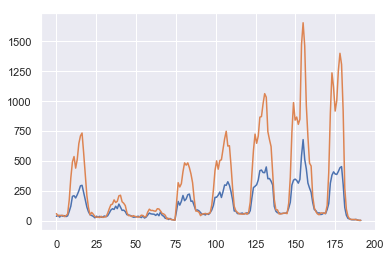

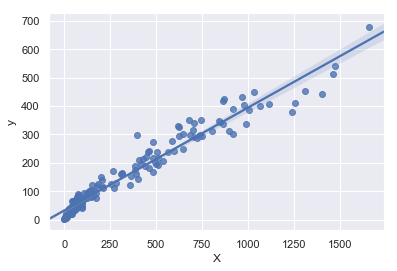

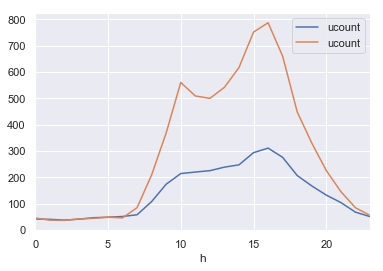

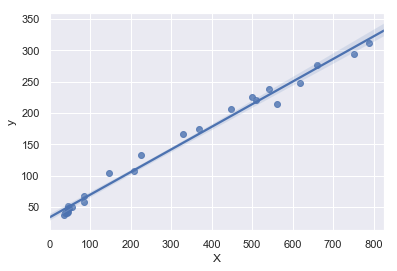

In [44]:
# Andamento dati 'rumore' raw count maggiore stretto di uno, durata maggiore di un trenta secondi, avgss maggiore di -70s

df           = pd.read_csv('csv_visits.txt')
df, dft, dff = organize(df,plot=False)

plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dft.ucount.values )
plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dff.ucount.values[:191] )

plt.figure()
reg_rt(y=dft.ucount.values, X=dff.ucount.values[:191])

print('\n---------------------------')
print('sum random: ', np.sum(dff.ucount.values),'sum non random: ', np.sum(dft.ucount.values))
print('freq h random: ', np.sum(dff.ucount.values)/(7*24),'freq h non random: ', np.sum(dft.ucount.values)/(7*24))
print('freq min random: ', np.sum(dff.ucount.values)/(7*24*60),'freq min non random: ', np.sum(dft.ucount.values)/(7*24*60))
print('---------------------------\n')


dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['ucount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['ucount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.ucount.values
y = tf.ucount.values

plt.figure()
reg_rt(X=y,y=X)


intercept:  [6.88723722] coef:  [[0.44832769]]
Pearson Correlation Coefficient:  0.7410688735349567 and a P-value of: 1.7108081616389586e-09

---------------------------
sum random:  1308 sum non random:  917
freq h random:  54.5 freq h non random:  38.208333333333336
freq min random:  0.9083333333333333 freq min non random:  0.6368055555555555
---------------------------

intercept:  [6.22438611] coef:  [[0.4726525]]
Pearson Correlation Coefficient:  0.827502207926603 and a P-value of: 6.096603198000728e-07


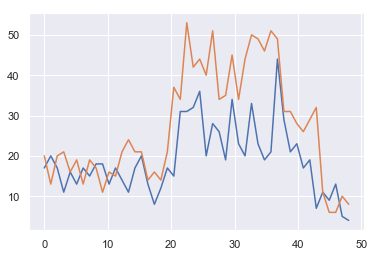

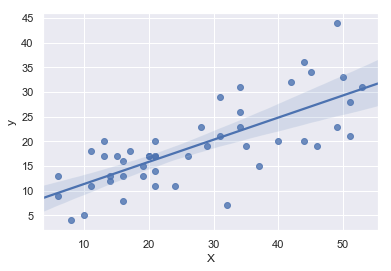

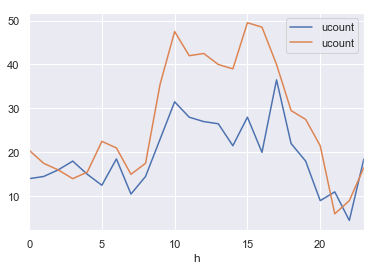

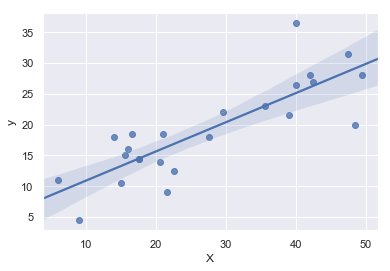

In [40]:
# Andamento dati 'visite' un giorno 

df           = pd.read_csv('csv_visit_day.txt')
df, dft, dff = organize(df,plot=False)

plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dft.ucount.values )
plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dff.ucount.values )

plt.figure()
reg_rt(y=dft.ucount.values, X=dff.ucount.values)

print('\n---------------------------')
print('sum random: ', np.sum(dff.ucount.values),'sum non random: ', np.sum(dft.ucount.values))
print('freq h random: ', np.sum(dff.ucount.values)/(24),'freq h non random: ', np.sum(dft.ucount.values)/(24))
print('freq min random: ', np.sum(dff.ucount.values)/(24*60),'freq min non random: ', np.sum(dft.ucount.values)/(24*60))
print('---------------------------\n')


dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['ucount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['ucount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.ucount.values
y = tf.ucount.values

plt.figure()
reg_rt(X=y,y=X)

intercept:  [-9.63066252] coef:  [[0.8024002]]
Pearson Correlation Coefficient:  0.9951076359311662 and a P-value of: 6.735953903435621e-48
intercept:  [-9.43310407] coef:  [[0.80176214]]
Pearson Correlation Coefficient:  0.9981104211565538 and a P-value of: 3.744360323605833e-28


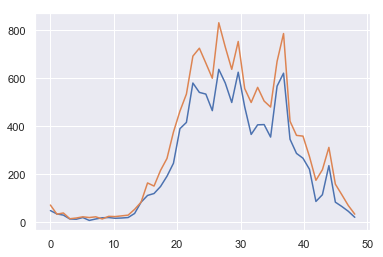

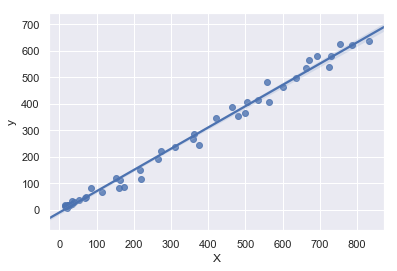

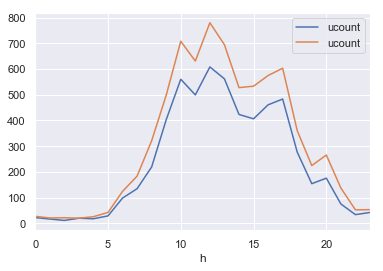

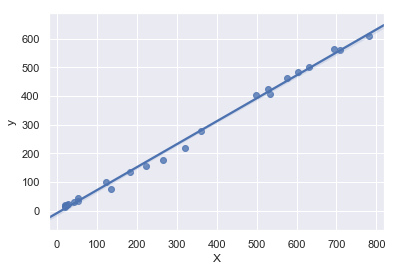

In [14]:
# Andamento dati 'rumore' un giorno 

df           = pd.read_csv('csv_noise.txt')
df, dft, dff = organize(df,plot=False)

plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dft.ucount.values )
plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dff.ucount.values[:] )

plt.figure()
reg_rt(y=dft.ucount.values, X=dff.ucount.values[:])


dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['ucount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['ucount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.ucount.values
y = tf.ucount.values

plt.figure()
reg_rt(X=y,y=X)

intercept:  [0.91017692] coef:  [[0.50699179]]
Pearson Correlation Coefficient:  0.9925676263964444 and a P-value of: 9.856866482418114e-44
intercept:  [0.78310445] coef:  [[0.50735073]]
Pearson Correlation Coefficient:  0.9946037869048887 and a P-value of: 3.796221077808674e-23


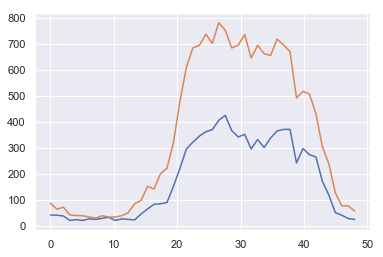

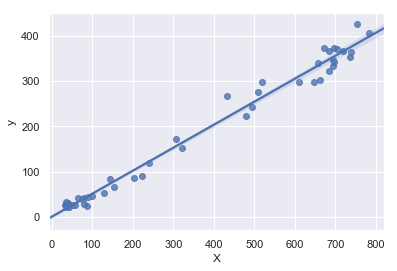

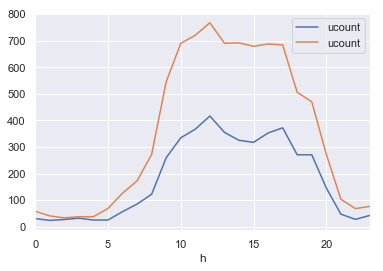

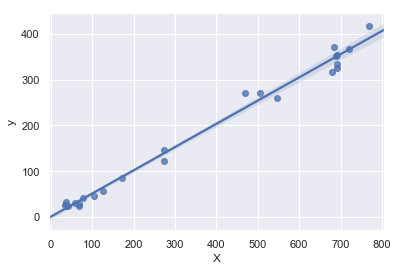

In [16]:
# Andamento dati 'clean' un giorno 

df           = pd.read_csv('csv_clean.txt')
df, dft, dff = organize(df,plot=False)

plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dft.ucount.values )
plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dff.ucount.values )

plt.figure()
reg_rt(y=dft.ucount.values, X=dff.ucount.values)


dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['ucount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['ucount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.ucount.values
y = tf.ucount.values

plt.figure()
reg_rt(X=y,y=X)

In [25]:
50*0.3 + 50,20*0.3 + 20

(65.0, 26.0)

In [24]:
df           = pd.read_csv('freq.txt')

print('Dati Settimanali')
print(df['Date'][0])
print('-------------------')
print('frequenza al minuto filtri: {}'.format(df['Filter'][0]))
print('{}   {:.2f}'.format(df['Type'][0],df['Count'][0]/(7*24*60))),print('{}   {:.2f}'.format(df['Type'][1],df['Count'][1]/(7*24*60)))
print('-------------------')
print('frequenza al minuto filtri: {}'.format(df['Filter'][2]))
print('{}   {:.2f}'.format(df['Type'][2],df['Count'][2]/(7*24*60))),print('{}   {:.2f}'.format(df['Type'][3],df['Count'][3]/(7*24*60)))
print('-------------------')
print('frequenza al minuto filtri: {}'.format(df['Filter'][4]))
print('{}   {:.2f}'.format(df['Type'][4], df['Count'][4]/(7*24*60))),print('{}   {:.2f}'.format(df['Type'][5], df['Count'][5]/(7*24*60)))
print('-------------------')
print('frequenza al minuto filtri: {}'.format(df['Filter'][6]))
print('{}   {:.2f}'.format(df['Type'][6], df['Count'][6]/(7*24*60))),print('{}   {:.2f}'.format(df['Type'][7], df['Count'][7]/(7*24*60)))
print('-------------------')
print('frequenza al minuto filtri: {}'.format(df['Filter'][8]))
print('{}   {:.2f}'.format(df['Type'][8], df['Count'][8]/(7*24*60))),print('{}   {:.2f}'.format(df['Type'][9], df['Count'][9]/(7*24*60)))

print('-------------------')
print('-#################-')
print('-------------------')

print('Dati Giornalieri')
print(df['Date'][10])
print('-------------------')
print('frequenza al minuto filtri: {}'.format(df['Filter'][10]))
print('{}  {:.2f}'.format(df['Type'][10],df['Count'][10]/(24*60))),print('{}   {:.2f}'.format(df['Type'][11],df['Count'][11]/(24*60)))
print('-------------------')
print('frequenza al minuto filtri: {}'.format(df['Filter'][12]))
print('{}  {:.2f}'.format(df['Type'][12],df['Count'][12]/(24*60))),print('{}   {:.2f}'.format(df['Type'][13],df['Count'][13]/(24*60)))
print('-------------------')
print('frequenza al minuto filtri: {}'.format(df['Filter'][14]))
print('{}  {:.2f}'.format(df['Type'][14], df['Count'][14]/(24*60))),print('{}   {:.2f}'.format(df['Type'][15], df['Count'][15]/(24*60)))
print('-------------------')
print('frequenza al minuto filtri: {}'.format(df['Filter'][16]))
print('{}  {:.2f}'.format(df['Type'][16], df['Count'][16]/(24*60))),print('{}   {:.2f}'.format(df['Type'][17], df['Count'][17]/(24*60)))
print('-------------------')
print('frequenza al minuto filtri: {}'.format(df['Filter'][18]))
print('{}  {:.2f}'.format(df['Type'][18], df['Count'][18]/(24*60))),print('{}   {:.2f}'.format(df['Type'][19], df['Count'][19]/(24*60)))
print('')

Dati Settimanali
from 20/11/2019 00:00 to 27/11/2019 00:00
-------------------
frequenza al minuto filtri:  No filtri
Random   72.82
Non_Random   83.41
-------------------
frequenza al minuto filtri:  VisitDuration 1000 to inf
Random   12.74
Non_Random   20.88
-------------------
frequenza al minuto filtri:  VisitDuration 1000 to 5m
Random   11.88
Non_Random   16.08
-------------------
frequenza al minuto filtri:    VisitDuration 5m   to 60m
Random   0.92
Non_Random   6.04
-------------------
frequenza al minuto filtri:  VisitDuration 0    to 1000
Random   60.72
Non_Random   65.27
-------------------
-#################-
-------------------
Dati Giornalieri
from 20/11/2019 00:00 to 21/11/2019 00:00
-------------------
frequenza al minuto filtri:  No filtri
Random  109.63
Non_Random   119.95
-------------------
frequenza al minuto filtri:   VisitDuration 1000 to inf
Random  13.47
Non_Random   22.80
-------------------
frequenza al minuto filtri:   VisitDuration 1000 to 5m
Random  12.89
N

intercept:  [24299.13303155] coef:  [[1.31690514]]
Pearson Correlation Coefficient:  0.7027513350789132 and a P-value of: 3.5114100931873675e-26

--------------------------------
--- Frequenza Raw Data Count ---
sum non random: 7558750.00 sum random: 2658350.00
freq h non random: 44992.56 freq h random: 15823.51
freq min non random: 749.88 freq min random: 263.73
--------------------------------

intercept:  [19125.68626002] coef:  [[1.65440428]]
Pearson Correlation Coefficient:  0.8407786514616296 and a P-value of: 2.6972260136704047e-07


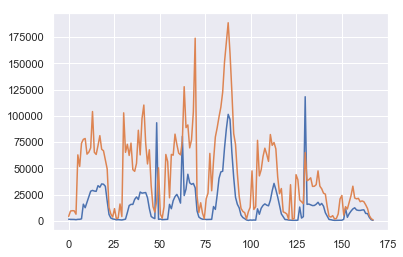

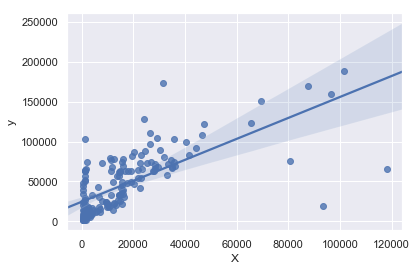

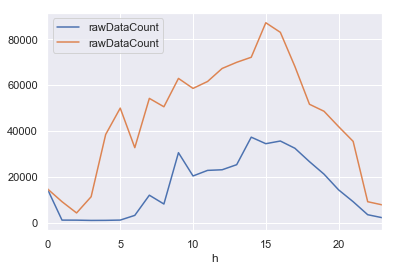

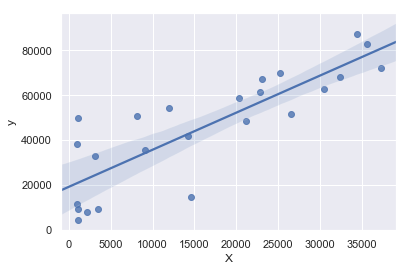

In [11]:
df           = pd.read_csv('csv_raw_week.txt')
df, dft, dff = organize(df, plot=False)



plt.plot(np.linspace(start=0, num=dft.rawDataCount.values.shape[0] , stop= dft.rawDataCount.values.shape[0] ),dft.rawDataCount.values )
plt.plot(np.linspace(start=0, num=dft.rawDataCount.values.shape[0] , stop= dft.rawDataCount.values.shape[0] ),dff.rawDataCount.values )

plt.figure()
reg_rt(X=dft.rawDataCount.values, y=dff.rawDataCount.values)

print('\n--------------------------------')
print('--- Frequenza Raw Data Count ---')
print('sum non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)),'sum random: {:.2f}'.format( np.sum(dft.rawDataCount.values)))
print('freq h non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)/(7*24)),'freq h random: {:.2f}'.format( np.sum(dft.rawDataCount.values)/(7*24)))
print('freq min non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)/(7*24*60)),'freq min random: {:.2f}'.format( np.sum(dft.rawDataCount.values)/(7*24*60)))
print('--------------------------------\n')


dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['rawDataCount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['rawDataCount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.rawDataCount.values
y = tf.rawDataCount.values

plt.figure()
reg_rt(X=X,y=y)



intercept:  [7166.8526691] coef:  [[1.82656396]]
Pearson Correlation Coefficient:  0.9510239319285295 and a P-value of: 1.4901444417882304e-86

--------------------------------
--- Frequenza Raw Data Count ---
sum non random: 5454199.00 sum random: 2326865.00
freq h non random: 32465.47 freq h random: 13850.39
freq min non random: 541.09 freq min random: 230.84
--------------------------------

intercept:  [-1452.52039207] coef:  [[0.47135948]]
Pearson Correlation Coefficient:  0.9613079807425262 and a P-value of: 8.38102607421862e-14


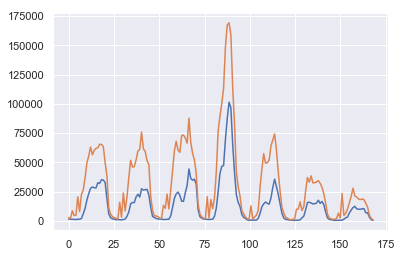

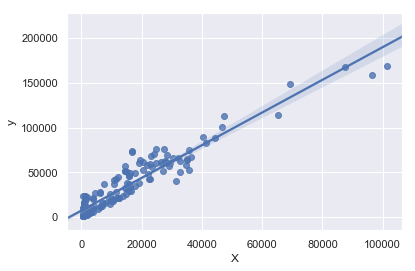

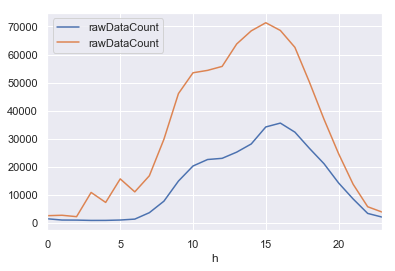

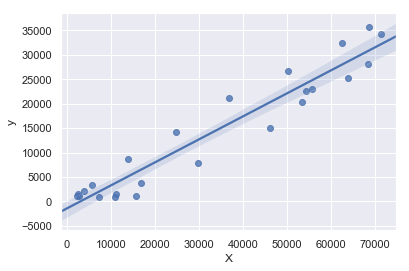

In [25]:
df           = pd.read_csv('csv_raw_under6h.csv')
df, dft, dff = organize(df, plot=False)

plt.plot(np.linspace(start=0, num=dft.rawDataCount.values.shape[0] , stop= dft.rawDataCount.values.shape[0] ),dft.rawDataCount.values )
plt.plot(np.linspace(start=0, num=dff.rawDataCount.values.shape[0] , stop= dff.rawDataCount.values.shape[0] ),dff.rawDataCount.values )

plt.figure()
reg_rt(X=dft.rawDataCount.values, y=dff.rawDataCount.values)

print('\n--------------------------------')
print('--- Frequenza Raw Data Count ---')
print('sum non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)),'sum random: {:.2f}'.format( np.sum(dft.rawDataCount.values)))
print('freq h non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)/(7*24)),'freq h random: {:.2f}'.format( np.sum(dft.rawDataCount.values)/(7*24)))
print('freq min non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)/(7*24*60)),'freq min random: {:.2f}'.format( np.sum(dft.rawDataCount.values)/(7*24*60)))
print('--------------------------------\n')


dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['rawDataCount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['rawDataCount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.rawDataCount.values
y = tf.rawDataCount.values

plt.figure()
reg_rt(X=y,y=X)



intercept:  [525.05298482] coef:  [[1.00740234]]
Pearson Correlation Coefficient:  0.9972650890119413 and a P-value of: 9.88226349129205e-190

--------------------------------
--- Frequenza Raw Data Count ---
sum non random: 1669344.00 sum random: 1569517.00
freq h non random: 9936.57 freq h random: 9342.36
freq min non random: 165.61 freq min random: 155.71
--------------------------------

intercept:  [-249.42819036] coef:  [[0.9653019]]
Pearson Correlation Coefficient:  0.9984299548025923 and a P-value of: 4.886890992534286e-29


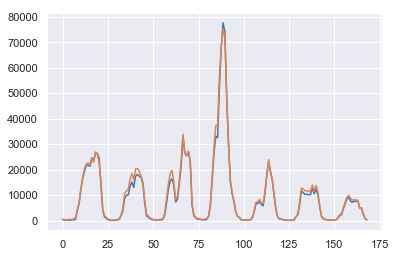

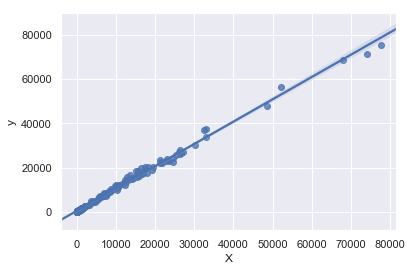

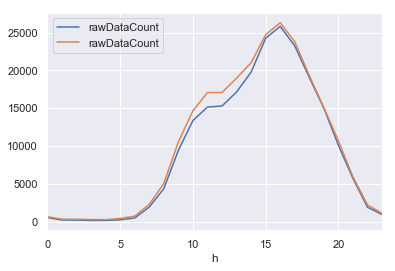

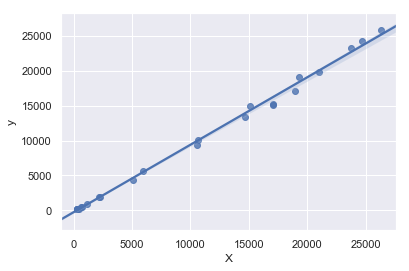

In [28]:
df           = pd.read_csv('csv_under1000.txt')
df, dft, dff = organize(df, plot=False)

plt.plot(np.linspace(start=0, num=dft.rawDataCount.values.shape[0] , stop= dft.rawDataCount.values.shape[0] ),dft.rawDataCount.values )
plt.plot(np.linspace(start=0, num=dff.rawDataCount.values.shape[0] , stop= dff.rawDataCount.values.shape[0] ),dff.rawDataCount.values )

plt.figure()
reg_rt(X=dft.rawDataCount.values, y=dff.rawDataCount.values)

print('\n--------------------------------')
print('--- Frequenza Raw Data Count ---')
print('sum non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)),'sum random: {:.2f}'.format( np.sum(dft.rawDataCount.values)))
print('freq h non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)/(7*24)),'freq h random: {:.2f}'.format( np.sum(dft.rawDataCount.values)/(7*24)))
print('freq min non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)/(7*24*60)),'freq min random: {:.2f}'.format( np.sum(dft.rawDataCount.values)/(7*24*60)))
print('--------------------------------\n')


dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['rawDataCount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['rawDataCount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.rawDataCount.values
y = tf.rawDataCount.values

plt.figure()
reg_rt(X=y,y=X)



intercept:  [317.17632754] coef:  [[1.07610347]]
Pearson Correlation Coefficient:  0.9954420755130504 and a P-value of: 2.366524989734094e-171

--------------------------------
--- Frequenza Raw Data Count ---
sum non random: 362547.00 sum random: 287390.00
freq h non random: 2158.02 freq h random: 1710.65
freq min non random: 35.97 freq min random: 28.51
--------------------------------

intercept:  [60.71541266] coef:  [[1.22602321]]
Pearson Correlation Coefficient:  0.999218498861881 and a P-value of: 2.2792665411409145e-32


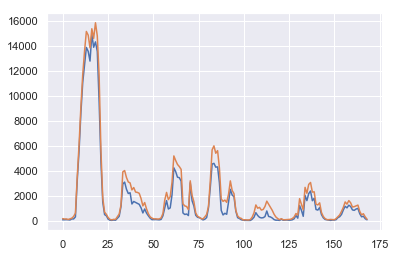

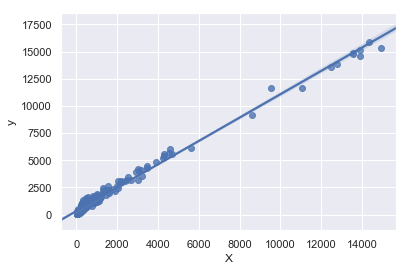

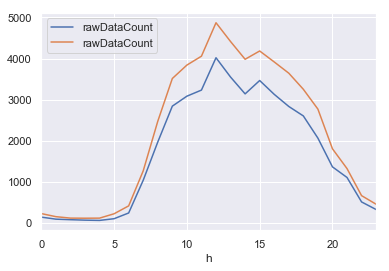

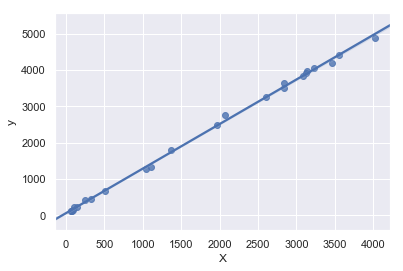

In [23]:
df           = pd.read_csv('csv_raw1.txt')
df, dft, dff = organize(df, plot=False)

plt.plot(np.linspace(start=0, num=dft.rawDataCount.values.shape[0] , stop= dft.rawDataCount.values.shape[0] ),dft.rawDataCount.values )
plt.plot(np.linspace(start=0, num=dff.rawDataCount.values.shape[0] , stop= dff.rawDataCount.values.shape[0] ),dff.rawDataCount.values )

plt.figure()
reg_rt(X=dft.rawDataCount.values, y=dff.rawDataCount.values)

print('\n--------------------------------')
print('--- Frequenza Raw Data Count ---')
print('sum non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)),'sum random: {:.2f}'.format( np.sum(dft.rawDataCount.values)))
print('freq h non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)/(7*24)),'freq h random: {:.2f}'.format( np.sum(dft.rawDataCount.values)/(7*24)))
print('freq min non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)/(7*24*60)),'freq min random: {:.2f}'.format( np.sum(dft.rawDataCount.values)/(7*24*60)))
print('--------------------------------\n')


dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['rawDataCount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['rawDataCount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.rawDataCount.values
y = tf.rawDataCount.values

plt.figure()
reg_rt(X=X,y=y)



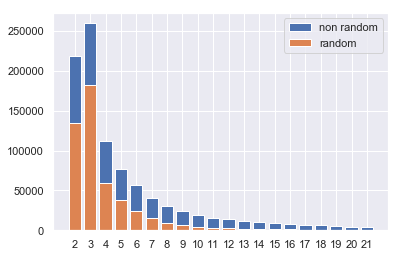

In [66]:
df           = pd.read_csv('csv_hist_over1000.txt')

del df['rand_1']

dft = df[df['rand'] == True]
dff = df[df['rand'] == False]

del dft['rand']
del dff['rand']

plt.bar(dff.rawDataCount.values,dff.Count.values, label='non random')
plt.bar(dft.rawDataCount.values,dft.Count.values, label='random')

plt.xticks(dft.rawDataCount.values)
plt.legend()
print('')


In [67]:
df           = pd.read_csv('csv_hist_under1000.txt')

del df['rand_1']

dft = df[df['rand'] == True]
dff = df[df['rand'] == False]

del dft['rand']
del dff['rand']

plt.bar(dff.rawDataCount.values,dff.Count.values, label='non random')
plt.bar(dft.rawDataCount.values,dft.Count.values, label='random')

plt.xticks(dft.rawDataCount.values)
plt.legend()
print('')


In [12]:
2.5/7, 2/3, 18/7, 270/50, 291/51

(0.35714285714285715,
 0.6666666666666666,
 2.5714285714285716,
 5.4,
 5.705882352941177)